# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
import tensorflow as tf
import random
from sklearn.utils import shuffle

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train =  len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

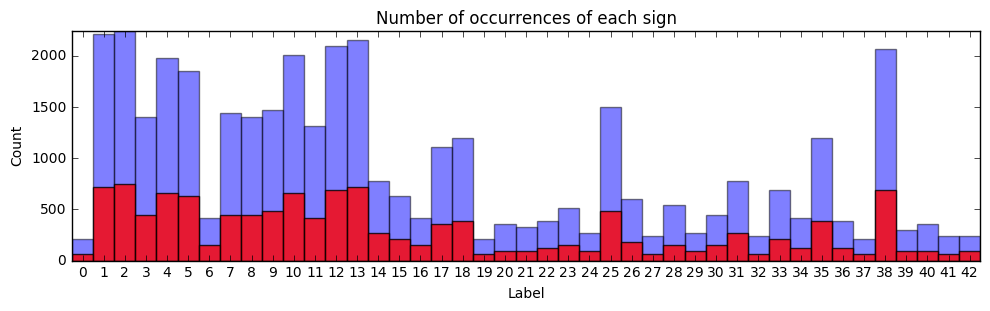

In [5]:
### Number of occurrences of each sign
### In both training and test sets

labels_train, labels_count_train = np.unique(y_train, return_counts=True)
labels_test, labels_count_test = np.unique(y_test, return_counts=True)

y_pos = np.arange(len(labels_train))


plt.figure(figsize=(10,3))

plt.bar(y_pos, labels_count_train, width=1, align='center', alpha=.5)
plt.bar(y_pos, labels_count_test, width=1, align='center', alpha=.8, color='r')
plt.xticks(y_pos, labels_train)

plt.xlabel('Label')
plt.ylabel('Count')
plt.axis('tight')
plt.tight_layout()
plt.title('Number of occurrences of each sign')
plt.show()


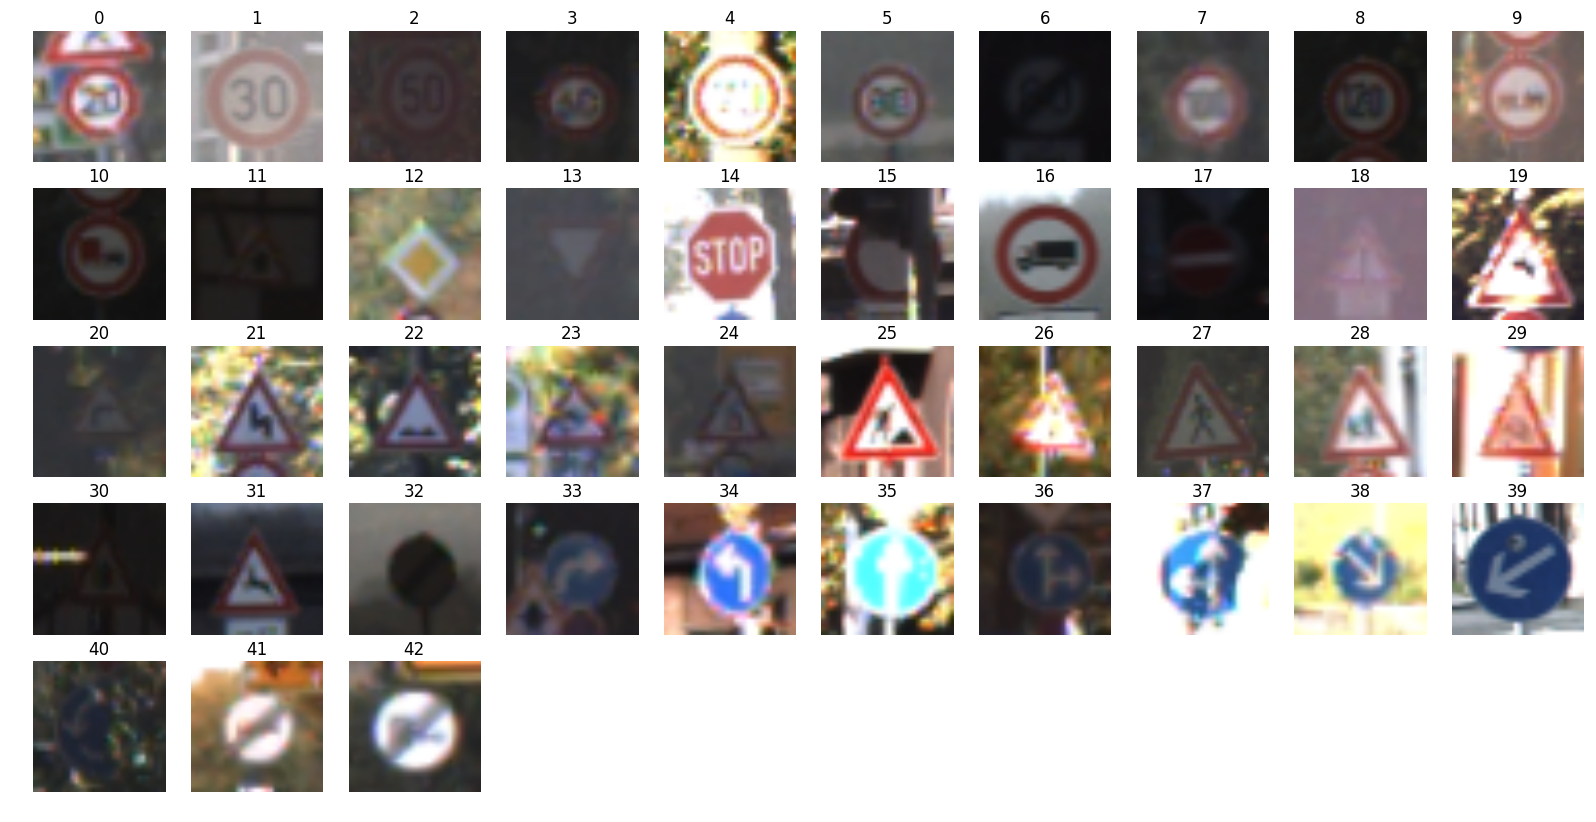

In [6]:
### Print few signs

plt.figure(figsize=(20,20))
for i in range(43):
    for idx in range(len(y_train)):
        if (i==y_train[idx]):
            plt.subplot(10,10,i+1)
            plt.axis('off')
            plt.imshow(X_train[idx,:,:,:])
            plt.title(i)
            
            break
            
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

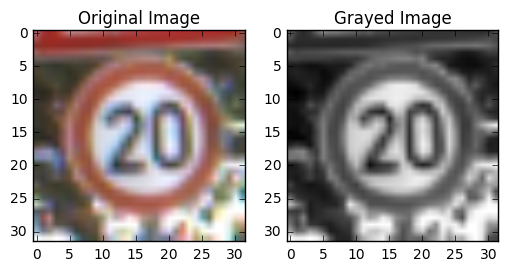

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Images to gray scales

import cv2 

def images2gray(images):
    
    num = len(images)
    image_shape = images[0].shape
    images_g = np.zeros([num, image_shape[0], image_shape[1], 1], dtype=np.uint8)
    for i in range(num):
        images_g[i,:,:,0] = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
        
    return images_g

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[50,:,:,:])

X_train = images2gray(X_train)
X_test = images2gray(X_test)

plt.subplot(1,2,2)
plt.title("Grayed Image")
plt.imshow(X_train[50,:,:,0], cmap='gray')
plt.show()


In [8]:
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [-1 to 1]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -1.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I try 2 different methods:

- Set images to gray scales.  This had an immediate increase in accuracy of the model compared with just sending the color images. So this stayed in the final preprocessing
- Normalizing the images.  By using normalization.  It didn't improved final accuracy, so finally this step was not included 


In [9]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### First lets create the validation set.  So far we only have a training and test sets

##We divide the test in 2 sets, the test and validation sets.


indexes = list(range(len(X_test)))

# Ramdonly shuffle the indexes
random.seed(1)
shuffle(indexes)

# From the 12630 images we put 6000 in the validation set
validation_idx, test_idx = indexes[:6000], indexes[6000:]
X_validation, y_validation = X_test[validation_idx,:], y_test[validation_idx]
X_test, y_test = X_test[test_idx,:], y_test[test_idx]



Number of training examples = 39209
Number of validation examples = 6000
Number of testing examples = 6630


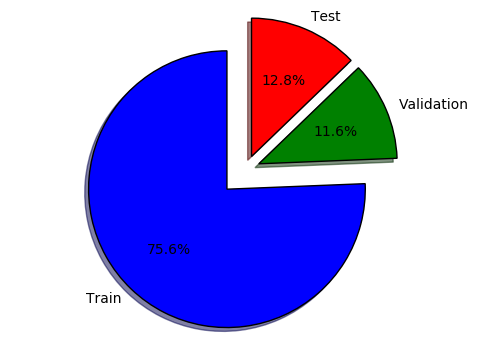

In [10]:
# And print the sets sizes

n_train, n_validation, n_test = len(X_train), len(X_validation), len(X_test)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)


labels = ['Train', 'Validation', 'Test']
sizes =  [n_train, n_validation, n_test]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(.2, .1, .1), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [11]:
# Data augmentation

def rotate(img, deg):
    rows, cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), deg, 1)
    return cv2.warpAffine(img, M,(cols,rows))


def addRotatedImages(images, labels, deg):
    '''
    Return new images and labels with newly created images build on rotating them deg degrees.
    images: Numpy array of images
    labels: array of labels
    deg: list of the new degrees by which images should be rotated.
    '''    
    images_return = np.copy(images)
    labels_return = np.copy(labels)
    for d in deg:
        images_rotated = np.copy(images)
        labels_rotated = np.copy(labels)
        for i in range(len(images_rotated)):
            images_rotated[i,:,:,0] = rotate(images_rotated[i,:,:,0], d)
        
        images_return = np.concatenate((images_return, images_rotated), axis=0)
        labels_return = np.concatenate([labels_return, labels_rotated])
        
    return images_return, labels_return


X_train, y_train = addRotatedImages(X_train, y_train, [10,20,-10,-20,30,-30])


n_train_prev = n_train
n_train = len(X_train)

print("Number of training examples before =", n_train_prev)
print("Number of training examples after =", n_train)


Number of training examples before = 39209
Number of training examples after = 274463


In [12]:
X_train = normalize_grayscale(X_train)
X_test = normalize_grayscale(X_test)
X_validation = normalize_grayscale(X_validation)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Original data provided was divided in 2 data sets
- training: 39209 samples
- test: 12630

I didn't want to reduce the number of training samples, so I divided the test set into 2 different data sets, by following below approach:
- get array on indexes same size as test set
- shuffle the index array
- first 6000 indexes will define the new validation set
- rest (from 6000  to 12630) will define the test set.

Now the differents sets are:

- Training set: 39209 samples
- Validation set: 6000 samples
- Testing set: 6630 samples

#### Generation of new data ####
As DN need to be feed with lots of data to improve accuracy I have added new data based on the existing training data.
These new data is composed of images rotated in different angles.
The final training set was then composed by:
- original test set
- images from test set rotated: -30, -20, -10, 10, 20, 30  degrees.

Total number of final data for training was: 274463

The improvement in accuracy was very noticeable.



In [13]:
### Define your architecture here.

def LeNetModified(x, pkeep):    
    mu = 0
    sigma = 0.1
    
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, 8], mu, sigma), name="wc1"),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 8, 16], mu, sigma), name="wc2"),
        'wc3': tf.Variable(tf.truncated_normal([4, 4, 16, 32], mu, sigma), name="wc3"),                           
        
        'wc5': tf.Variable(tf.truncated_normal([7*7*32, 120], mu, sigma), name="wc5"),
        'wf6': tf.Variable(tf.truncated_normal([120, 84], mu, sigma), name="wf6"),
        'out': tf.Variable(tf.truncated_normal([84, 43], mu, sigma), name="out")
    }
    
    biases = {
        'bc1': tf.Variable(tf.truncated_normal([8], mu, sigma)),
        'bc2': tf.Variable(tf.truncated_normal([16], mu, sigma)),
        'bc3': tf.Variable(tf.truncated_normal([32], mu, sigma)),
        'bc5': tf.Variable(tf.truncated_normal([120], mu, sigma)),
        'bf6': tf.Variable(tf.truncated_normal([84], mu, sigma)),
        'out': tf.Variable(tf.truncated_normal([43], mu, sigma))
    }
    
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    c1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding="VALID")
    c1 = tf.nn.bias_add(c1, biases['bc1'])
    # TODO: Activation.
    c1 = tf.nn.relu(c1)
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    c1 = tf.nn.max_pool(c1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    c2 = tf.nn.conv2d(c1, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    c2 = tf.nn.bias_add(c2, biases['bc2'])
   
    # TODO: Activation.
    c2 = tf.nn.relu(c2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    #c2 = tf.nn.max_pool(c2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Layer ConvLayer 3  Input 10x10x16   7x7x32
    c3 = tf.nn.conv2d(c2, weights['wc3'], strides=[1,1,1,1], padding='VALID')
    c3 = tf.nn.bias_add(c3, biases['bc3'])
    c3 = tf.nn.relu(c3)
    
    # TODO: Flatte, input = 7x7x32  Output = 
    c3 = tf.contrib.layers.flatten(c3)


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    #c2 = tf.contrib.layers.flatten(c2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    c5 = tf.add(tf.matmul(c3, weights['wc5']), biases['bc5'])
    # TODO: Activation.
    c5 = tf.nn.relu(c5)
    c5 = tf.nn.dropout(c5, pkeep)
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    f6 = tf.add(tf.matmul(c5, weights['wf6']), biases['bf6'])
    # TODO: Activation.
    f6 = tf.nn.relu(f6)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(f6, weights['out']), biases['out'])
    
    return logits


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The model is a convolutional type of Neural Network. Below the different layers

    Input are images of 32x32 pixels in gray scale
    
    1st layer: Convolutional   
               Input = 32x32x1 Output = 28x28x8 (Filter: 5x5x8)
               Activation: RELU
               Pooling: Max, Output: 14x14x8  (Stride: 2)
               
    2nd layer: Convolutional
               Input = 14x14x8 Output = 10x10x16 (Filter: 5x5x16)
               Activation: RELU
               
    3rd layer: Convolutional
               Input = 10x10x16 Output = 7x7x32 (Filter: 4x4x32)
               Activation: RELU
                
    4rd layer: Fully connected
               Input = 1568 (4x4x32)  Output = 120
               Activation: RELU
               Dropout: 0.50
               
    5th layer: Fully connected
               Input = 120   Output = 84
               Activation: RELU
               
    6th layer: Fully connected
               Input = 84  Output = 43
               
               Output: logits
               
               

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

tf.set_random_seed(0)

EPOCHS = 5
BATCH_SIZE = 128
DROP_OUT = .50

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# Probability of keeping a node during dropout = 1.0 at test and 0.75 on training
pkeep = tf.placeholder(tf.float32)

#one_hot_y = tf.one_hot(y, 43)   #This line is not working in Windows 10 + GPU so replaced with the patched

## Found on github.com - tensorflow
'''
tf.one_hot makes python die.  Below function does same without issues.
'''
def one_hot_patch(x,depth):
    #workaround by name-name
    sparse_labels=tf.reshape(x,[-1,1])
    derived_size=tf.shape(sparse_labels)[0]
    indices=tf.reshape(tf.range(0,derived_size,1),[-1,1])
    concated=tf.concat(1,[indices,sparse_labels])
    outshape=tf.concat(0,[tf.reshape(derived_size,[1]),tf.reshape(depth,[1])])
    return tf.sparse_to_dense(concated, outshape,1.0,0.0)
            
            
one_hot_y = one_hot_patch(y, 43)



In [15]:
rate = 0.001
random.seed(1)
logits = LeNetModified(x, pkeep)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, pkeep: 1 })
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [17]:
# Variables used to store plot data
log_batch_step = 200
batch_counter = 0
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

Training...

EPOCH 1 ...
Training Accuracy = 0.958
Validation Accuracy = 0.921

EPOCH 2 ...
Training Accuracy = 0.984
Validation Accuracy = 0.936

EPOCH 3 ...
Training Accuracy = 0.990
Validation Accuracy = 0.946

EPOCH 4 ...
Training Accuracy = 0.993
Validation Accuracy = 0.940

EPOCH 5 ...
Training Accuracy = 0.995
Validation Accuracy = 0.950

Model saved
Test Accuracy = 0.949


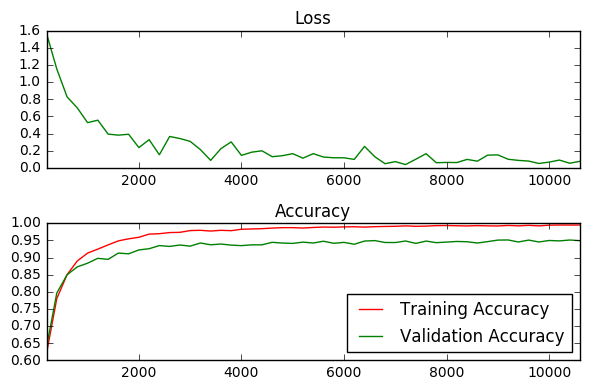

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_counter += 1
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, l =sess.run(
                [training_operation, loss_operation], 
                feed_dict={x: batch_x, y: batch_y, pkeep: DROP_OUT})
            if not batch_counter % log_batch_step:
                loss_batch.append(l)
                batches.append(batch_counter)
                train_acc_batch.append(evaluate(X_train, y_train))
                valid_acc_batch.append(evaluate(X_validation, y_validation))
        
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    
    saver.save(sess, './lenetmodified')
    print("Model saved")
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim(batches[0], batches[-1])

acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'g', label='Validation Accuracy')
acc_plot.set_xlim(batches[0], batches[-1])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

***Optimizer:***
For training the model I used a AdamOptimizer.   After comparing both the AdamOptimizer and GradientDescentOptimizer I found that the first one gives much better results.  See below figures of averaces accuracies.

- AdamOptimizer : 0.949  
- GradientDescentOptimizer: 0.88  

For evaluating the loss I used the average cross-entropy between the target and the softmax activation function applied to the prediction (tf.nn.softmax_cross_entropy_with_logits)

***Batch size:***
Although theory suggest that the larger the batch size (up to what GPU mem supports) the better results, I didn't found clear improvements when using 256 or 512 samples per batch.  So I keep the batch size to 128 images

Batch Size: 128

***Epochs***
Number of Epochs is reduced from original number 10 to 5.  Valiation accuracy was not improved after that and increasing the number of Epochs could make the model to overfit.

Epochs: 5

***Learning rate***
Different values were tested, best value seem to be 0.001

Learning rate: 0.001

***DropOut***
In the first fully connected layer I added a dropout of 50%

pkeep: 0.50


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

***Process***
I used training set for feeding the model learning process and calculate the accuracy on each Epoch. Accuracy in each Epoch is calculated first with the training set and then again with the validation set.  This information is valuable to detect when system overfits.
I kept iterating changing model layers as well as hyperparameters trying to improve valiation accuracy and while not overfiting.
Once results seem correct, then I calculate the accuracy on the test set.

***Model***
I started with LeNet model and kept changing adding/removing layers.
As number of total output classes was larger than original LeNet, I tried to add some additional fully connected layers at the end without much success on accuracy improvements. I finally added one additional convolutional layer, while moving out one pooling layer.  Adding/removing layers and testing its accuracy on the validation set was the basic mode of operation.

I didn't appreciate big improvements, at least compared with data preprocessing efforts (moving to gray images) and specially data aumentation, which increased substatially the final accuracy of the model.

Adding drop out to the first fully connected layer  moved from around 0.92 to 0.95 accuracy improvement.

***Future work***
As future work on this I plan to do some U type of model as suggested in the "Traffic Sign Recognition with Multi-Scale Convolutional Networks" from Sermanet/LeCunn.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

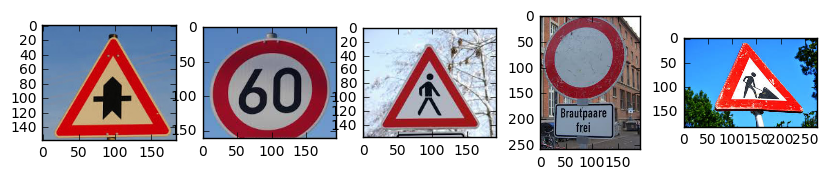

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

files = os.listdir('signs/')
images = np.zeros([len(files), 32, 32, 1])

plt.figure(figsize=(10,10))
for idx,file in enumerate(files):
    image = mpimg.imread('signs/' + file)
    plt.subplot(5,5,idx+1)
    plt.imshow(image)
    

plt.show()
    

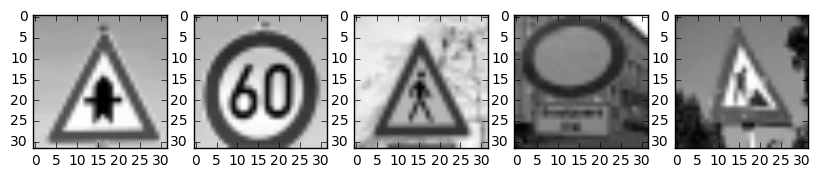

In [20]:
#files = files[0:5]
images = np.zeros([len(files), 32, 32, 1])

plt.figure(figsize=(10,10))
for idx,file in enumerate(files):
    image = mpimg.imread('signs/' + file)
    image = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA )
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images[idx,:,:,0] = image
    plt.subplot(5,5,idx+1)
    plt.imshow(image, cmap='gray')
    
images = normalize_grayscale(images)

plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Images are plotted above, before and after processing (grayed and scaled). 
Yield sign is not so centered so is assumed that lower certainty will be found.


In [21]:
### Run the predictions here.

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenetmodified')
    classification = sess.run(tf.nn.top_k( tf.nn.softmax(logits), k=3), feed_dict={x:images, pkeep:1})


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Yes, the model has correctly predicted the 5 signs.
Accuracy on new signs: 100%


1. Right-of-way at the next intersection (11) 100.0%   
2. Beware of ice/snow (30) 0.0%   
3. Turn left ahead (34) 0.0%


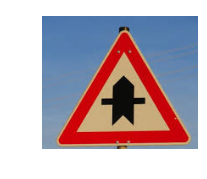

1. Speed limit (60km/h) (3) 52.6%   
2. Turn left ahead (34) 47.2%   
3. Keep right (38) 0.1%


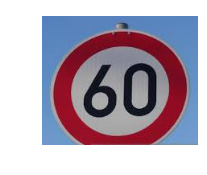

1. Pedestrians (27) 100.0%   
2. Right-of-way at the next intersection (11) 0.0%   
3. Dangerous curve to the left (19) 0.0%


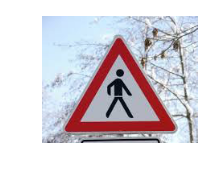

1. End of all speed and passing limits (32) 95.6%   
2. End of no passing (41) 4.1%   
3. No passing (9) 0.1%


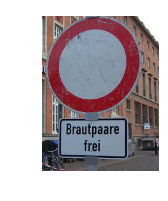

1. Road work (25) 99.9%   
2. General caution (18) 0.1%   
3. Wild animals crossing (31) 0.0%


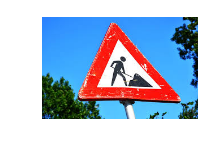

In [22]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

classes = classification[1]
probs = classification[0]

import pandas as pd
df = pd.read_csv('signnames.csv')


for idx,file in enumerate(files):
    image = mpimg.imread('signs/' + file)
    image = cv2.resize(image, (32,32), interpolation=cv2.INTER_AREA )
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    images[idx,:,:,0] = image
    plt.figure(figsize=(2,2))
       
    print("1. {} ({:.0f}) {:.1f}%   ".format(df.SignName[classes[idx][0]], classes[idx][0],  100.*probs[idx][0]))
    print("2. {} ({:.0f}) {:.1f}%   ".format(df.SignName[classes[idx][1]], classes[idx][1], 100.*probs[idx][1]))
    print("3. {} ({:.0f}) {:.1f}%".format(df.SignName[classes[idx][2]], classes[idx][2], 100.*probs[idx][2]))
    
    plt.axis('off')
    plt.imshow(mpimg.imread('signs/' + files[idx]))
    plt.show()
    
    

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

From above cells each image is printed along with the top 3 predictions and its probabilities for each.
All of them are correct besides picture 4th.

The model predicts first 3 with top certainty, so the first prediction has a 100% certainty of its response and certainly predicts the signal correctly. 
The 4th sign is predicted wrongly and any of the possible responses were predicting it correctly.  We could have increase the top k in this case, but from predicting point of view it would have been maximum 5% certainty which is undoubtely not enough.
A deeper study of why this sign was not predicted correctly should be done but most probably this is due to the image not being cropped the same way that the training images.
Final image is correctly predicted with a slightly minor certainty than first few, maybe due to the fact that the signal angle is big diffent (not fully perpendicular).



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.